In [54]:
# ROC curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [55]:
from sklearn.datasets import make_classification 
from sklearn.neighbors import KNeighborsClassifier # k 근접 이웃 
from sklearn.ensemble import RandomForestClassifier # 앙상블_랜덤 포레스트 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

In [56]:
# roc curve 함수 정의

def plot_roc_curve(fpr, tpr): 
    plt.plot(fpr,tpr,color='purple',label='ROC')
    plt.plot([0,1],[0,1], color='red',linestyle="--")
    plt.xlable("false positive rate")
    plt.ylable("true positive rate")
    plt.title("Receiver Operating Characteristics(ROC) Curve")
    plt.legend  # 범례
    plt.show()
    
   

In [57]:
# fpr(false positive rate) : 특이도(틀리도ㅋ)
# tpr(true positive rate) : 민감도, 재현율

In [58]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [59]:
# Train, Test 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [60]:
# random forest model 적용

model = RandomForestClassifier()
model.fit(train_X, train_y)  # fit 은 반드시 train data로

RandomForestClassifier()

In [61]:
# 테스트 데이터 셋으로 예측(확률 예측)

print(model.predict(test_X))  # 모델 예측 결과 값


[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [62]:
model.predict_proba(test_X)   # 모델 예측 결과 값이 나올 확률 

array([[0.98, 0.02],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.05, 0.95],
       [0.19, 0.81],
       [0.21, 0.79],
       [0.05, 0.95],
       [0.28, 0.72],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.02, 0.98],
       [0.95, 0.05],
       [0.2 , 0.8 ],
       [0.18, 0.82],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.9 , 0.1 ],
       [0.13, 0.87],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.82, 0.18],
       [0.11, 0.89],
       [0.18, 0.82],
       [0.15, 0.85],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.17, 0.83],
       [0.13, 0.87],
       [0.13, 0.87],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.29, 0.71],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.72, 0.28],
       [0.07, 0.93],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.29, 0.71],
       [0.95, 0.05],
       [0.82, 0.18],
       [0.27, 0.73],
       [0.96, 0.04],
       [0.19, 0.81],
       [0.2 ,

In [63]:
probs = model.predict_proba(test_X)

In [64]:
# 성능 평가

# positive class만 유지 
probs[:,1]

array([0.02, 0.96, 0.03, 0.03, 0.95, 0.81, 0.79, 0.95, 0.72, 0.11, 0.77,
       0.98, 0.05, 0.8 , 0.82, 0.02, 0.86, 0.1 , 0.87, 0.03, 0.05, 0.18,
       0.89, 0.82, 0.85, 0.82, 0.05, 0.83, 0.87, 0.87, 0.02, 0.04, 0.81,
       0.66, 0.71, 0.11, 0.01, 0.28, 0.93, 0.04, 0.01, 0.71, 0.05, 0.18,
       0.73, 0.04, 0.81, 0.8 , 0.81, 0.09, 0.01, 0.75, 0.04, 0.07, 0.08,
       0.07, 0.77, 0.8 , 0.11, 0.07, 0.48, 0.01, 0.96, 0.08, 0.19, 0.35,
       0.04, 0.65, 0.92, 0.5 , 0.87, 0.  , 0.91, 0.01, 0.05, 0.93, 0.03,
       0.98, 0.92, 0.85, 0.06, 0.08, 0.71, 0.91, 0.23, 0.77, 0.  , 0.05,
       0.51, 0.7 , 0.86, 0.86, 0.46, 0.02, 0.94, 0.24, 0.88, 0.77, 0.03,
       0.02, 0.87, 0.04, 0.73, 0.08, 0.04, 0.94, 0.15, 0.72, 0.55, 0.68,
       0.87, 0.01, 0.85, 0.91, 0.97, 0.94, 0.87, 0.05, 0.92, 0.  , 0.02,
       0.04, 0.02, 0.86, 0.83, 0.07, 0.81, 0.94, 0.86, 0.89, 0.85, 0.01,
       0.92, 0.85, 0.28, 0.79, 0.06, 0.86, 0.94, 0.75, 0.87, 0.75, 0.04,
       0.02, 0.9 , 0.11, 0.8 , 0.22, 0.12, 0.78, 0.

In [65]:
probs = probs[:,1]

In [66]:
# auc 구하기

roc_auc_score(test_y, probs)  # test data 실제값, 예측값

# 재현율, 특이값 ROC 그래프에서 1이 가까운게 좋은건데 0.95 나온거지 

0.9568773399893029

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

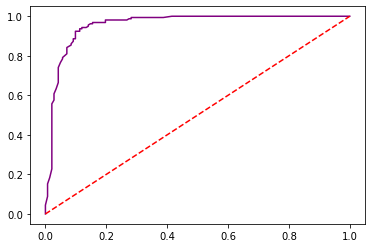

In [67]:
auc = roc_auc_score(test_y, probs)

# roc curve 곡선 그리기 
fpr, tpr, thresholds= roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)